In [2]:
# Stock Price Time Series Forecasting Using Transformer
# Based on S&P 500 data from Yahoo Finance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yfinance as yf
from datetime import datetime

# Machine learning imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

[*********************100%***********************]  1 of 1 completed

Data shape: (3847, 5)
Data with indicators shape: (3798, 14)
NaN values: 0

Sample data with technical indicators:
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2025-04-11  5363.359863  5381.459961  5220.770020  5255.560059  5602550000   
2025-04-14  5405.970215  5459.459961  5358.020020  5441.959961  5031440000   
2025-04-15  5396.629883  5450.410156  5386.439941  5411.990234  4317110000   
2025-04-16  5275.700195  5367.240234  5220.790039  5335.750000  4607750000   
2025-04-17  5282.700195  5328.310059  5255.580078  5305.450195  4714880000   

Price             RSI        MACD MACD_Signal  Middle_Band   Upper_Band  \
Ticker                                                                    
Date                                                                      
2025-04-11  38.393513 -144.439441 -


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/76 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 2/50
70/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5499e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5221e-04 - val_loss: 0.0053
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9976e-04 - val_loss: 0.0065
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7142e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.7111e-04 - val_loss: 0.0030
Epoch 5/50
71/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1731e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1725e-04 - val_loss: 0.0019
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0708e-04 - val_loss: 0.0075
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1071e-04 - val_loss: 0.0062
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9030e-04 - val_loss: 0.0041
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4165e-04 - val_loss: 0.0027
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4705e-04 - val_loss: 0.0049
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5606e-04 - val_loss: 0.0034
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2836e-04 - val_loss: 0.0029
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4120e-04 - val_loss: 0.0032
Epoch 14/50
71/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2579e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2598e-04 - val_loss: 0.0019
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5029e-04 - val_loss: 0.0033
Epoch 16/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3334e-04 - val_loss: 0.0025
Epoch 17/50
71/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1127e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1174e-04 - val_loss: 0.0018
Epoch 18/50
71/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1575e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1586e-04 - val_loss: 0.0018
Epoch 19/50
73/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2242e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2237e-04 - val_loss: 0.0015
Epoch 20/50
71/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0751e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0705e-04 - val_loss: 8.0280e-04
Epoch 21/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2545e-04 - val_loss: 0.0021
Epoch 22/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0199e-04 - val_loss: 0.0011
Epoch 23/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.8741e-05 - val_loss: 0.0034
Epoch 24/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0296e-04 - val_loss: 0.0025
Epoch 25/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0601e-04 - val_loss: 0.0019
Epoch 26/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2174e-04 - val_loss: 0.0011
Epoch 27/50
73/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0025e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0014e-04 - val_loss: 6.5629e-04
Epoch 28/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.0738e-04 - val_loss: 0.0012
Epoch 29/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0120e-04 - val_loss: 0.0014
Epoch 30/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0734e-04 - val_loss: 0.0010
Epoch 31/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0757e-04 - val_loss: 0.0024
Epoch 32/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4484e-05 - val_loss: 0.0023
Epoch 33/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3596e-05 - val_loss: 6.6006e-04
Epoch 34/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.3403e-05 - val_loss: 9.5389e-04
Epoch 35/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0228e-04 - val_loss: 9.9212e-04
Epoch 36/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3326e-05 - val_loss: 0.0010
Epoch 37/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.1678e-05 - val_loss: 0.0012

=== Training Tr

76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 180ms/step - loss: 0.0378 - val_loss: 0.0445
Epoch 2/50
73/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0053 - val_loss: 0.0305
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024 - val_loss: 0.0330
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0317
Epoch 5/50
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5765e-04

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.5694e-04 - val_loss: 0.0220
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.9643e-04 - val_loss: 0.0306
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.9349e-04 - val_loss: 0.0317
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.4329e-04 - val_loss: 0.0344
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4993e-04 - val_loss: 0.0361
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4043e-04 - val_loss: 0.0309
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0098e-04 - val_loss: 0.0284
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7968e-04 - val_loss: 0.0273
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9633e-04 - val_loss: 0.0270
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7133e-04 - val_loss: 0.0299
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8684e-04 - val_loss: 0.0233


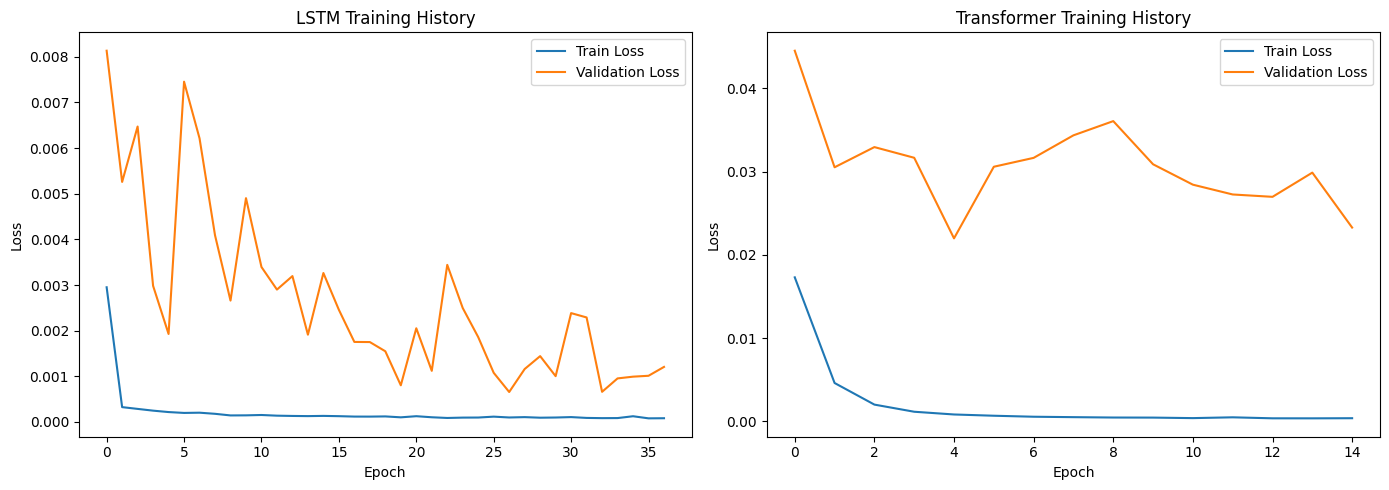


=== LSTM Model Evaluation ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error (MSE): 45183.8999
Root Mean Squared Error (RMSE): 212.5650
Mean Absolute Error (MAE): 175.7984
Mean Absolute Percentage Error (MAPE): 3.4782%

=== Transformer Model Evaluation ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
Mean Squared Error (MSE): 2279443.9866
Root Mean Squared Error (RMSE): 1509.7828
Mean Absolute Error (MAE): 1341.4667
Mean Absolute Percentage Error (MAPE): 26.6531%


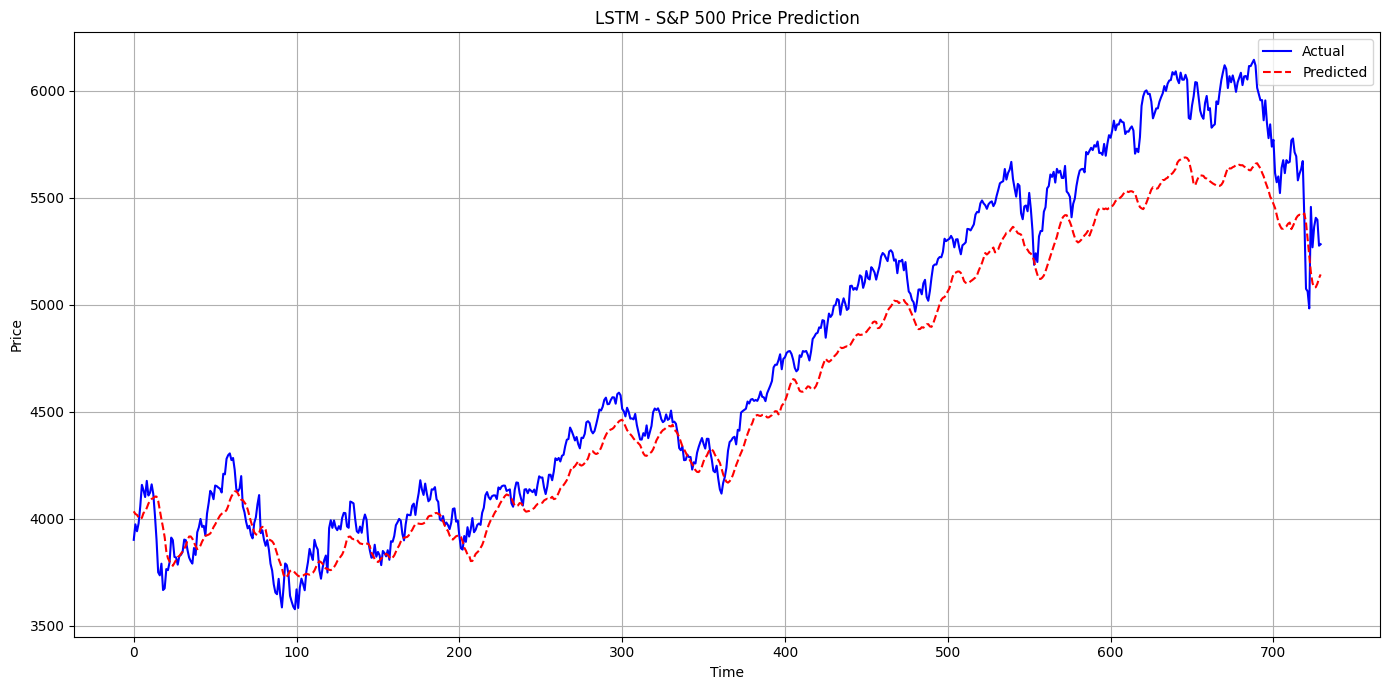

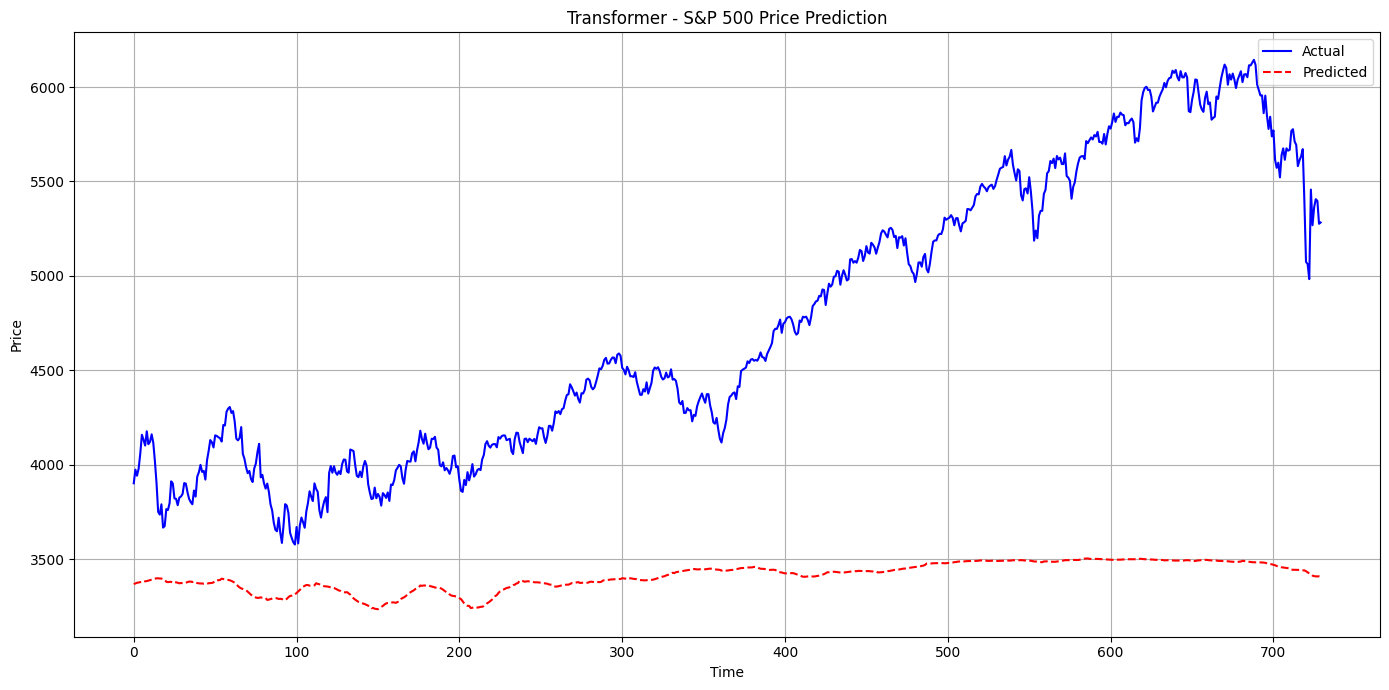

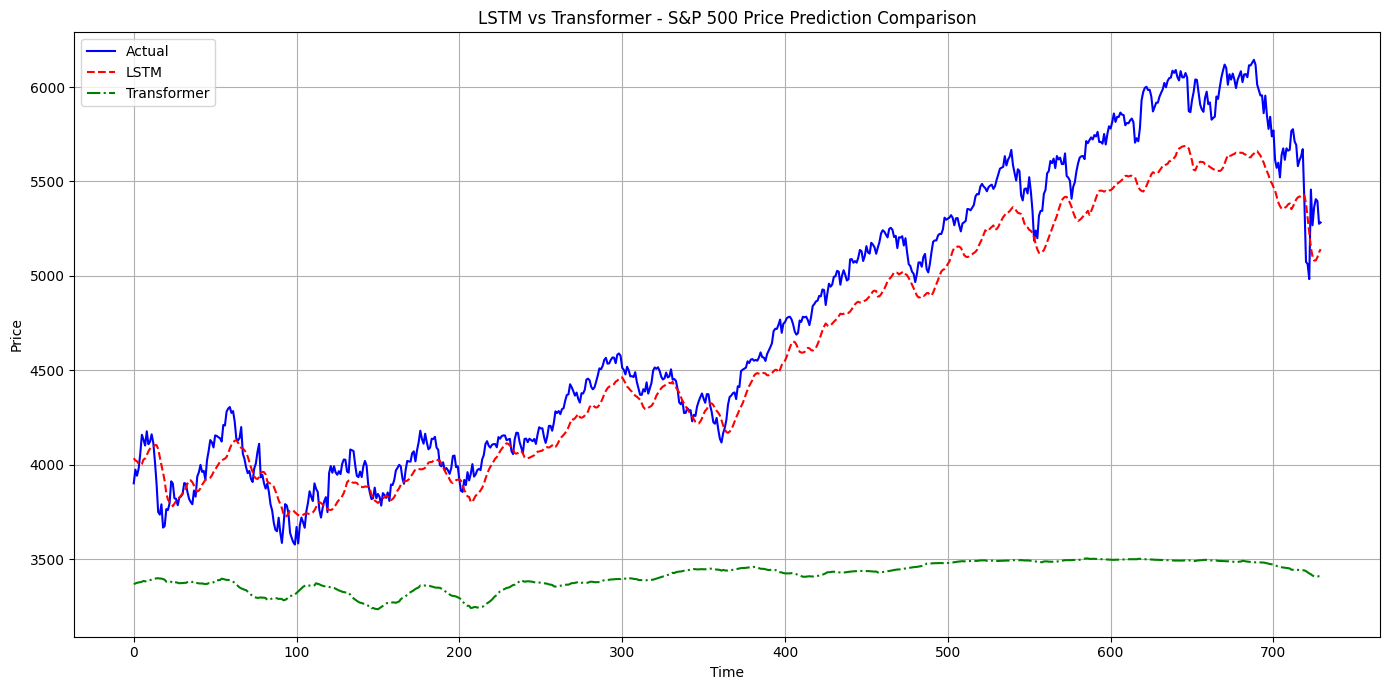

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


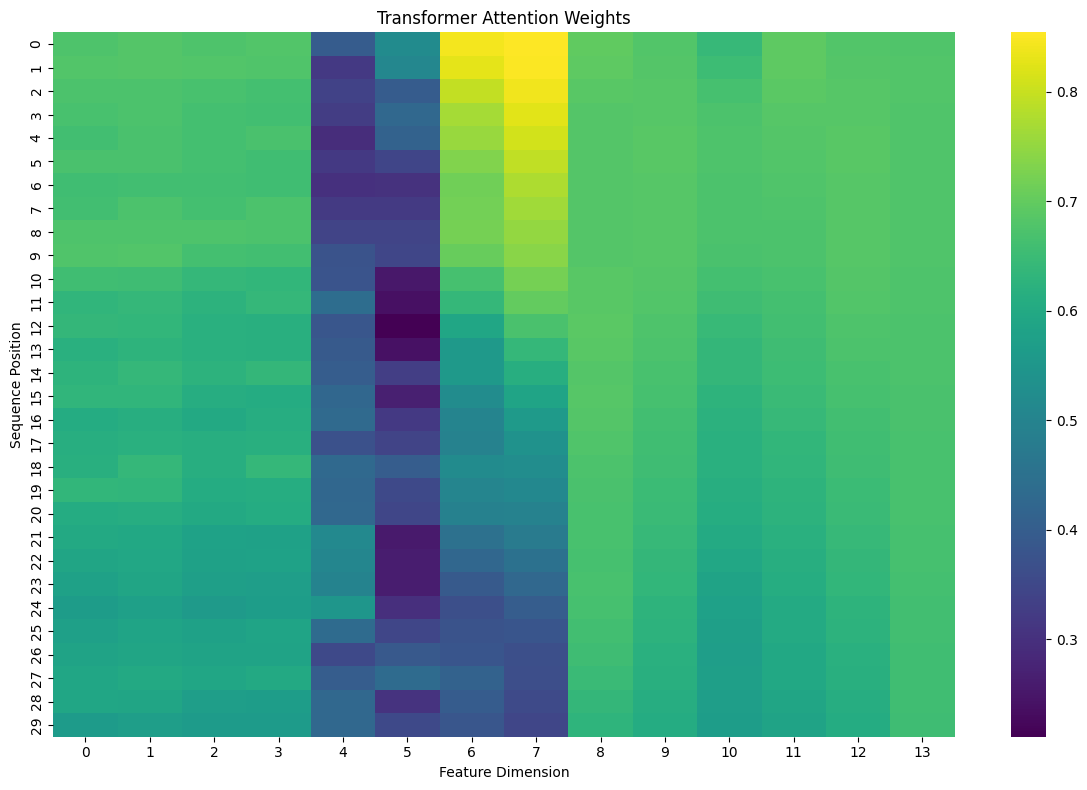


=== Model Comparison ===
              LSTM   Transformer
MSE   45183.899875  2.279444e+06
RMSE    212.565049  1.509783e+03
MAE     175.798369  1.341467e+03
MAPE      3.478200  2.665315e+01

=== Feature Importance Analysis ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4

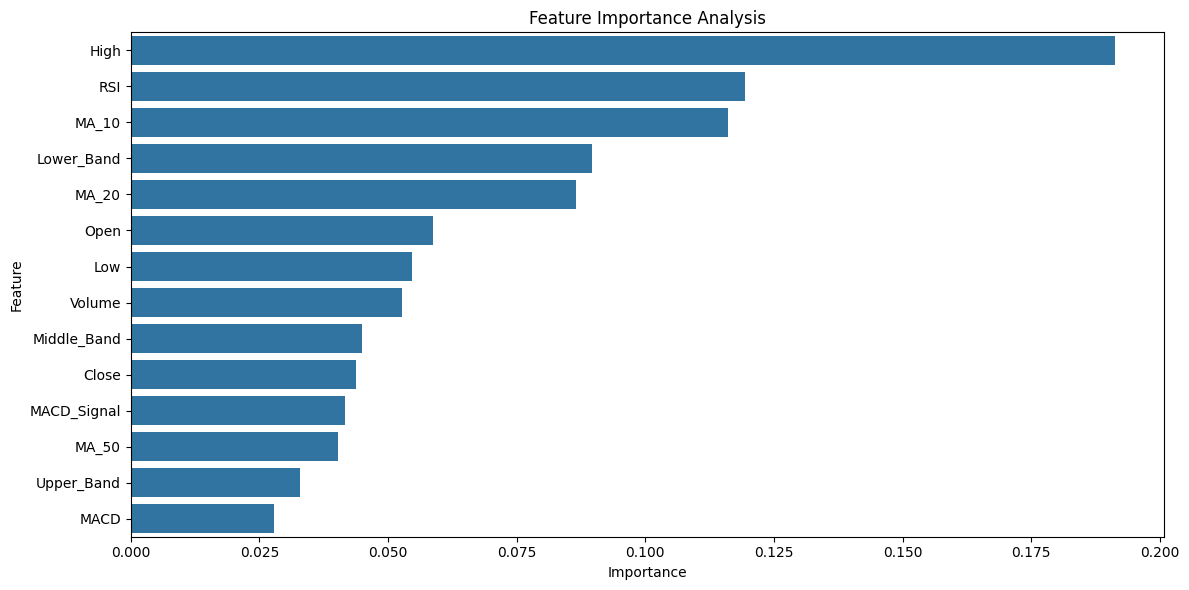


=== Most Important Features ===
        Feature  Importance
1          High    0.191184
5           RSI    0.119363
11        MA_10    0.116021
10   Lower_Band    0.089701
12        MA_20    0.086449
0          Open    0.058678
2           Low    0.054575
4        Volume    0.052726
9   Middle_Band    0.044892
3         Close    0.043776
7   MACD_Signal    0.041637
13        MA_50    0.040324
8    Upper_Band    0.032936
6          MACD    0.027740

Results saved to model_comparison_results.csv


In [4]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configuration
class Config:
    ticker = "^GSPC"
    start_date = "2010-01-01"
    end_date = datetime.now().strftime("%Y-%m-%d")
    test_size = 0.2
    window_size = 30  # Number of previous days to use for prediction
    future_days = 1   # Number of days to predict ahead
    feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal',
                      'Upper_Band', 'Middle_Band', 'Lower_Band', 'MA_10', 'MA_20', 'MA_50']
    epochs = 50
    batch_size = 32
    learning_rate = 0.001
    transformer_units = 256
    transformer_num_heads = 8
    transformer_dropout = 0.1
    lstm_units = 128
    lstm_dropout = 0.2
    models_dir = "models"

config = Config()

# Create directory for model checkpoints
if not os.path.exists(config.models_dir):
    os.makedirs(config.models_dir)

# Data Collection and Preparation
def download_data(ticker, start_date, end_date):
    """Download stock data from Yahoo Finance"""
    print(f"Downloading data for {ticker} from {start_date} to {end_date}...")
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

# Feature Engineering: Technical Indicators
def add_technical_indicators(df):
    """Add technical indicators to the dataframe"""
    # Create a copy to avoid SettingWithCopyWarning
    df = df.copy()

    # Calculate RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Calculate MACD (Moving Average Convergence Divergence)
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    df['Middle_Band'] = df['Close'].rolling(window=20).mean()
    std_dev = df['Close'].rolling(window=20).std()
    # Make sure std_dev is a Series, not a DataFrame
    if isinstance(std_dev, pd.DataFrame):
        std_dev = std_dev.iloc[:, 0]  # Take the first column if it's a DataFrame
    df['Upper_Band'] = df['Middle_Band'] + (std_dev * 2)
    df['Lower_Band'] = df['Middle_Band'] - (std_dev * 2)

    # Calculate Moving Averages
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()

    # Drop NaN values
    df.dropna(inplace=True)

    return df

# Data Preprocessing
def preprocess_data(df, feature_columns, target_column='Close', test_size=0.2):
    """Preprocess data for model training"""
    # Extract selected features
    data = df[feature_columns].copy()

    # Scale the data
    scaler_features = MinMaxScaler(feature_range=(0, 1))
    scaler_target = MinMaxScaler(feature_range=(0, 1))

    # Fit the scaler on all data to get proper min/max
    scaled_features = scaler_features.fit_transform(data)
    scaled_target = scaler_target.fit_transform(df[[target_column]])

    # Split into train and test sets
    split_idx = int(len(scaled_features) * (1 - test_size))
    X_train_scaled = scaled_features[:split_idx]
    X_test_scaled = scaled_features[split_idx:]
    y_train_scaled = scaled_target[:split_idx]
    y_test_scaled = scaled_target[split_idx:]

    return (X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled,
            scaler_features, scaler_target)

# Create windowed dataset
def create_sequences(X, y, window_size, future_days=1):
    """Create sequences of data for time series prediction"""
    X_seq, y_seq = [], []

    for i in range(len(X) - window_size - future_days + 1):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size+future_days-1])

    return np.array(X_seq), np.array(y_seq)

# Model Definitions
def build_lstm_model(input_shape, lstm_units=128, dropout=0.2, learning_rate=0.001):
    """Build LSTM model for time series prediction"""
    model = Sequential([
        LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape),
        Dropout(dropout),
        LSTM(units=lstm_units),
        Dropout(dropout),
        Dense(units=64, activation='relu'),
        Dense(units=1)  # Output layer for regression
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error'
    )

    return model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    """Create a Transformer encoder block"""
    # Multi-head attention
    attention_output = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward network
    ffn_output = Dense(ff_dim, activation="relu")(attention_output)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    return LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

def build_transformer_model(input_shape, head_size=256, num_heads=8, ff_dim=256,
                          num_transformer_blocks=4, mlp_units=[128],
                          dropout=0.1, mlp_dropout=0.1, learning_rate=0.001):
    """Build Transformer model for time series prediction"""
    inputs = Input(shape=input_shape)
    x = inputs

    # Add positional encoding - THIS IS THE PROBLEMATIC PART
    # Instead of using tf functions directly, create a Lambda layer

    class PositionalEncoding(tf.keras.layers.Layer):
        def call(self, inputs):
            seq_length = tf.shape(inputs)[1]
            batch_size = tf.shape(inputs)[0]
            positions = tf.range(start=0, limit=seq_length, delta=1, dtype=tf.float32)
            positions = tf.expand_dims(positions, axis=0)
            positions = tf.tile(positions, [batch_size, 1])
            pos_encoding = tf.expand_dims(positions, axis=-1)

            return inputs

    # Apply positional encoding
    x = PositionalEncoding()(x)

    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Global average pooling
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # Final MLP layers
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)

    outputs = Dense(1)(x)  # Output layer for regression

    model = Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error'
    )

    return model

# Evaluation functions
def evaluate_model(model, X_test_seq, y_test_seq, scaler_target):
    """Evaluate model performance"""
    # Make predictions
    y_pred_scaled = model.predict(X_test_seq)

    # Inverse transform predictions and actual values
    y_test = scaler_target.inverse_transform(y_test_seq)
    y_pred = scaler_target.inverse_transform(y_pred_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

    return y_test, y_pred, {'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape}

def plot_predictions(actual, predictions, model_name):
    """Plot actual vs predicted values"""
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predictions, label='Predicted', color='red', linestyle='--')
    plt.title(f'{model_name} - S&P 500 Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{model_name}_predictions.png")
    plt.show()

def plot_comparison(actual, lstm_preds, transformer_preds):
    """Plot comparison of LSTM and Transformer predictions"""
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(lstm_preds, label='LSTM', color='red', linestyle='--')
    plt.plot(transformer_preds, label='Transformer', color='green', linestyle='-.')
    plt.title('LSTM vs Transformer - S&P 500 Price Prediction Comparison')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("model_comparison.png")
    plt.show()

def attention_visualization(model, X_test_seq, layer_idx=1):
    """Visualize attention weights from Transformer model"""
    # Create a new model that outputs attention weights
    attention_model = Model(
        inputs=model.input,
        outputs=model.layers[layer_idx].output
    )

    # Get sample data
    sample_data = X_test_seq[:1]

    # Get attention weights
    attention_weights = attention_model.predict(sample_data)

    # Plot attention heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(attention_weights[0], cmap='viridis')
    plt.title('Transformer Attention Weights')
    plt.xlabel('Feature Dimension')
    plt.ylabel('Sequence Position')
    plt.tight_layout()
    plt.savefig("attention_heatmap.png")
    plt.show()

# Main execution flow
def main():
    # Download and prepare data
    df = download_data(config.ticker, config.start_date, config.end_date)
    print(f"Data shape: {df.shape}")

    # Add technical indicators
    df_with_indicators = add_technical_indicators(df)
    print(f"Data with indicators shape: {df_with_indicators.shape}")

    # Check for any NaN values
    print(f"NaN values: {df_with_indicators.isnull().sum().sum()}")

    # Show sample of data with indicators
    print("\nSample data with technical indicators:")
    print(df_with_indicators.tail())

    # Preprocess data
    (X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled,
     scaler_features, scaler_target) = preprocess_data(
        df_with_indicators,
        config.feature_columns,
        test_size=config.test_size
    )

    # Create sequences
    X_train_seq, y_train_seq = create_sequences(
        X_train_scaled, y_train_scaled, config.window_size, config.future_days
    )
    X_test_seq, y_test_seq = create_sequences(
        X_test_scaled, y_test_scaled, config.window_size, config.future_days
    )

    print(f"Training sequences shape: {X_train_seq.shape}, {y_train_seq.shape}")
    print(f"Testing sequences shape: {X_test_seq.shape}, {y_test_seq.shape}")

    # Build and train LSTM model
    print("\n=== Training LSTM Model ===")
    lstm_model = build_lstm_model(
        input_shape=(config.window_size, len(config.feature_columns)),
        lstm_units=config.lstm_units,
        dropout=config.lstm_dropout,
        learning_rate=config.learning_rate
    )

    lstm_callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint(
            filepath=os.path.join(config.models_dir, 'lstm_model.h5'),
            save_best_only=True,
            monitor='val_loss'
        )
    ]

    lstm_history = lstm_model.fit(
        X_train_seq, y_train_seq,
        epochs=config.epochs,
        batch_size=config.batch_size,
        validation_split=0.2,
        callbacks=lstm_callbacks,
        verbose=1
    )

    # Build and train Transformer model
    print("\n=== Training Transformer Model ===")
    transformer_model = build_transformer_model(
        input_shape=(config.window_size, len(config.feature_columns)),
        head_size=config.transformer_units // config.transformer_num_heads,
        num_heads=config.transformer_num_heads,
        ff_dim=config.transformer_units,
        dropout=config.transformer_dropout,
        learning_rate=config.learning_rate
    )

    transformer_callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint(
            filepath=os.path.join(config.models_dir, 'transformer_model.h5'),
            save_best_only=True,
            monitor='val_loss'
        )
    ]

    transformer_history = transformer_model.fit(
        X_train_seq, y_train_seq,
        epochs=config.epochs,
        batch_size=config.batch_size,
        validation_split=0.2,
        callbacks=transformer_callbacks,
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(lstm_history.history['loss'], label='Train Loss')
    plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(transformer_history.history['loss'], label='Train Loss')
    plt.plot(transformer_history.history['val_loss'], label='Validation Loss')
    plt.title('Transformer Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig("training_history.png")
    plt.show()

    # Evaluate models
    print("\n=== LSTM Model Evaluation ===")
    y_test, lstm_preds, lstm_metrics = evaluate_model(
        lstm_model, X_test_seq, y_test_seq, scaler_target
    )

    print("\n=== Transformer Model Evaluation ===")
    _, transformer_preds, transformer_metrics = evaluate_model(
        transformer_model, X_test_seq, y_test_seq, scaler_target
    )

    # Plot predictions
    plot_predictions(y_test, lstm_preds, "LSTM")
    plot_predictions(y_test, transformer_preds, "Transformer")
    plot_comparison(y_test, lstm_preds, transformer_preds)

    # Try to visualize attention weights (may not work for all model architectures)
    try:
        attention_visualization(transformer_model, X_test_seq)
    except Exception as e:
        print(f"Could not visualize attention weights: {e}")

    # Compare model performance
    print("\n=== Model Comparison ===")
    metrics_df = pd.DataFrame({
        'LSTM': [lstm_metrics['mse'], lstm_metrics['rmse'], lstm_metrics['mae'], lstm_metrics['mape']],
        'Transformer': [transformer_metrics['mse'], transformer_metrics['rmse'],
                       transformer_metrics['mae'], transformer_metrics['mape']]
    }, index=['MSE', 'RMSE', 'MAE', 'MAPE'])

    print(metrics_df)

    # Feature importance analysis using model coefficients (simplified)
    print("\n=== Feature Importance Analysis ===")
    feature_importance = np.zeros(len(config.feature_columns))

    # Compute feature importance using a simple perturbation method
    for i in range(len(config.feature_columns)):
        # Create a perturbed test set
        X_test_perturbed = X_test_seq.copy()
        X_test_perturbed[:, :, i] = 0  # Zero out this feature

        # Make predictions with perturbed data
        y_pred_perturbed = transformer_model.predict(X_test_perturbed)
        y_pred_original = transformer_model.predict(X_test_seq)

        # Compute difference in predictions
        importance = np.mean(np.abs(y_pred_perturbed - y_pred_original))
        feature_importance[i] = importance

    # Normalize importance scores
    feature_importance = feature_importance / np.sum(feature_importance)

    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': config.feature_columns,
        'Importance': feature_importance
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance Analysis')
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    plt.show()

    print("\n=== Most Important Features ===")
    print(importance_df)

    # Save results to CSV
    results = {
        'Date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'Window Size': config.window_size,
        'Future Days': config.future_days,
        'LSTM MSE': lstm_metrics['mse'],
        'LSTM RMSE': lstm_metrics['rmse'],
        'LSTM MAE': lstm_metrics['mae'],
        'LSTM MAPE': lstm_metrics['mape'],
        'Transformer MSE': transformer_metrics['mse'],
        'Transformer RMSE': transformer_metrics['rmse'],
        'Transformer MAE': transformer_metrics['mae'],
        'Transformer MAPE': transformer_metrics['mape'],
    }

    results_df = pd.DataFrame([results])
    results_df.to_csv("model_comparison_results.csv", index=False)

    print("\nResults saved to model_comparison_results.csv")

if __name__ == "__main__":
    main()